<a href="https://colab.research.google.com/github/jeyakumarvs/datascience/blob/main/hotel_cancellation_pred_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

import sys
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

#classification ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#others
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [96]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [ ]:
# <H1>Data Wrangling & Visualization</H1>

In [97]:
# The dataset is already loaded below
data = pd.read_csv("/content/hotel_bookings_hack.csv")

In [98]:
data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient


In [99]:
#Explore columns
data.columns

Index(['id', 'is_cancelled', 'lead_time', 'arrival_week', 'duration',
       'segment', 'prev_cancel', 'booking_changes', 'deposit',
       'waiting_period', 'per_Day_price', 'parking', 'special_request',
       'cust_type'],
      dtype='object')

In [100]:
data.describe()

,id,is_cancelled,lead_time,arrival_week,duration,prev_cancel,booking_changes,waiting_period,per_Day_price,parking,special_request
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59695.500000,0.370416,104.011416,27.165173,3.427900,0.087118,0.221124,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,13.605138,2.557439,0.844336,0.652306,17.594721,50.535790,0.245291,0.792798
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,29848.250000,0.000000,18.000000,16.000000,2.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,59695.500000,0.000000,69.000000,28.000000,3.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,89542.750000,1.000000,160.000000,38.000000,4.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,119390.000000,1.000000,737.000000,53.000000,69.000000,26.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [101]:
#based on this information, there is no missing data; so, no need to worry about the filling the missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               119390 non-null  int64  
 1   is_cancelled     119390 non-null  int64  
 2   lead_time        119390 non-null  int64  
 3   arrival_week     119390 non-null  int64  
 4   duration         119390 non-null  int64  
 5   segment          119390 non-null  object 
 6   prev_cancel      119390 non-null  int64  
 7   booking_changes  119390 non-null  int64  
 8   deposit          119390 non-null  object 
 9   waiting_period   119390 non-null  int64  
 10  per_Day_price    119390 non-null  float64
 11  parking          119390 non-null  int64  
 12  special_request  119390 non-null  int64  
 13  cust_type        119390 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 12.8+ MB


In [102]:
#while concert the categorical varibles into Numerical varialble, noticed an issue in the data 
#data bas spaces in the trailing end and that makes the column names with trailing spaces

data["deposit2"] = data["deposit"].map(lambda x : x.strip())
data["cust_type2"] = data["cust_type"].map(lambda x : x.strip())
data["segment2"] = data["segment"].map(lambda x : x.strip())

In [103]:
data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA


In [18]:
 # Visualization, Modeling, Machine Learning

In [104]:
data.is_cancelled.value_counts()

0    75166
1    44224
Name: is_cancelled, dtype: int64

In [105]:
data.segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: segment, dtype: int64

In [106]:
data.deposit.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit, dtype: int64

In [107]:
data.cust_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: cust_type, dtype: int64

In [108]:
#Before generate the the corelation matrix, the categorical variables needs to be converted into Numertical variables

#******************************************
# *** 1 hot encoding is being used here ***
#******************************************

#1 segment
data_seg = data["segment2"]

dum_df1 = pd.get_dummies(data_seg, columns=["segment2"], prefix="seg")
dum_df1.head(10)

#add these features into the main training df
data = data.join(dum_df1)

data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2,seg_Aviation,seg_Complementary,seg_Corporate,seg_Direct,seg_Groups,seg_Offline TA/TO,seg_Online TA,seg_Undefined
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate,0,0,1,0,0,0,0,0
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA,0,0,0,0,0,0,1,0


In [109]:
#2 cust_type (use the second column with he the spaces at the end gor trimmed)
data_ctyp = data["cust_type2"]

dum_df2 = pd.get_dummies(data_ctyp, columns=["cust_type2"], prefix="ctyp")
dum_df2.head(10)

#add these features into the main training df
data = data.join(dum_df2)

data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2,seg_Aviation,seg_Complementary,seg_Corporate,seg_Direct,seg_Groups,seg_Offline TA/TO,seg_Online TA,seg_Undefined,ctyp_Contract,ctyp_Group,ctyp_Transient,ctyp_Transient-Party
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,1,0
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,1,0
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate,0,0,1,0,0,0,0,0,0,0,1,0
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA,0,0,0,0,0,0,1,0,0,0,1,0


In [110]:
#3 deposit (use the second column with he the spaces at the end gor trimmed)
data_dep = data["deposit2"]

dum_df3 = pd.get_dummies(data_dep, columns=["deposit2"], prefix="dep")
dum_df3.head(10)

#add these features into the main training df
data = data.join(dum_df3)

data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2,seg_Aviation,seg_Complementary,seg_Corporate,seg_Direct,seg_Groups,seg_Offline TA/TO,seg_Online TA,seg_Undefined,ctyp_Contract,ctyp_Group,ctyp_Transient,ctyp_Transient-Party,dep_No Deposit,dep_Non Refund,dep_Refundable
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [111]:
#split the train and test data
tr_data, test_data = train_test_split(data, test_size=0.4, random_state=42)
print("Training set count: ", len(tr_data))
print("Test set count: ",len(test_data))

Training set count:  71634
Test set count:  47756


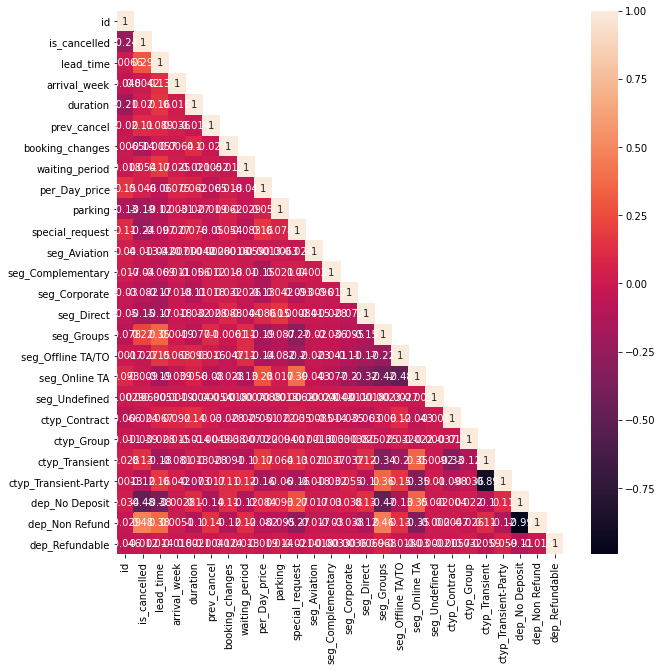

In [112]:
#Corelation Matrix
#1 visualize in a heatmap

tr_cor_mat=tr_data.corr()

tr_mask=np.array(tr_cor_mat)
tr_mask[np.tril_indices_from(tr_mask)] = False

viz1=plt.gcf()
viz1.set_size_inches(10,10)

sb.heatmap(data=tr_cor_mat, mask=tr_mask, annot=True)

In [113]:
#Corelation Matrix
#2 Looks at the values

tr_cor_mat["is_cancelled"].sort_values(ascending=False)

#The below result shows that dep_Non Refund, lead_time, seg_Groups, prev_cancel and ctyp_Transient are the top 5 features which are having high correlation with the cancellation

is_cancelled            1.000000
dep_Non Refund          0.480573
lead_time               0.293862
seg_Groups              0.221955
ctyp_Transient          0.131356
prev_cancel             0.110074
waiting_period          0.053578
per_Day_price           0.046497
duration                0.020323
seg_Undefined           0.006905
arrival_week            0.004231
seg_Online TA          -0.008983
dep_Refundable         -0.012116
seg_Aviation           -0.012841
ctyp_Contract          -0.023940
seg_Offline TA/TO      -0.027078
ctyp_Group             -0.038668
seg_Complementary      -0.039530
seg_Corporate          -0.082478
ctyp_Transient-Party   -0.122164
booking_changes        -0.142468
seg_Direct             -0.151218
parking                -0.194981
special_request        -0.237227
id                     -0.244269
dep_No Deposit         -0.476359
Name: is_cancelled, dtype: float64

In [114]:
#I think, this is the time to drop the least corelated features
# Keep the top-5 features (for this exercise)
# After low score, add few features from bottom

tr_data_mdl = tr_data.copy()
#Rename it to make it consitent with other features
tr_data_mdl.rename(columns={'dep_Non Refund':'dep_non_refund'}, inplace=True)
tr_data_mdl.rename(columns={'dep_No Deposit':'dep_no_deposit'}, inplace=True)
tr_data_mdl.rename(columns={'ctyp_Transient-Party':'ctyp_transient_party'}, inplace=True)

features_sel = ['id','is_cancelled','dep_non_refund','lead_time','seg_Groups','prev_cancel','ctyp_Transient', 'dep_no_deposit','special_request','ctyp_transient_party','booking_changes']
tr_data_mdl.drop(tr_data_mdl.columns.difference(features_sel),axis=1,inplace=True)

tr_data_mdl.head()

,id,is_cancelled,lead_time,prev_cancel,booking_changes,special_request,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
71397,71398,1,465,0,0,0,0,1,0,0,1
52819,52820,1,69,0,0,0,0,1,0,0,1
75267,75268,1,299,1,0,0,1,0,1,0,1
40803,40804,0,36,0,0,0,1,0,1,1,0
4784,4785,0,169,0,1,0,1,0,1,0,0


In [115]:
#remove id coulmn from training dataset as this needs to be removed before run the actual prediction
tr_data_mdl.drop(['id'], axis=1, inplace=True)
tr_data_mdl.columns

Index(['is_cancelled', 'lead_time', 'prev_cancel', 'booking_changes',
       'special_request', 'seg_Groups', 'ctyp_Transient',
       'ctyp_transient_party', 'dep_no_deposit', 'dep_non_refund'],
      dtype='object')

In [ ]:
# Visualize the top N features and their feature importance.

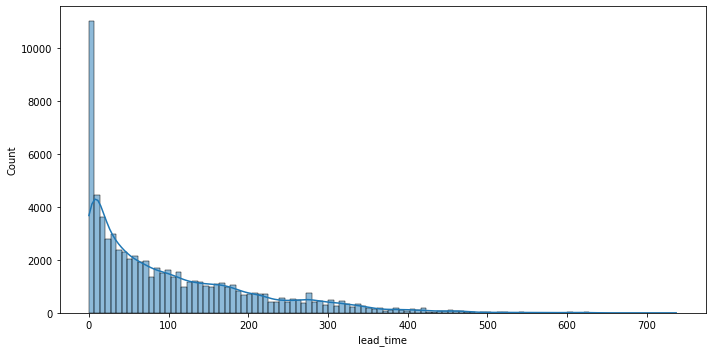

In [116]:
#1 lead Time
# use kde (kernel density estimation)

lead_time = tr_data["lead_time"]

plt.figure(figsize=(10,5))
sb.histplot(lead_time, kde=True)
plt.tight_layout()
plt.show()

In [117]:
# Test Data

test_data_mdl = test_data.copy()
#Rename it to make it consitent with other features
test_data_mdl.rename(columns={'dep_Non Refund':'dep_non_refund'}, inplace=True)
test_data_mdl.rename(columns={'dep_No Deposit':'dep_no_deposit'}, inplace=True)
test_data_mdl.rename(columns={'ctyp_Transient-Party':'ctyp_transient_party'}, inplace=True)

features_sel = ['id','is_cancelled','dep_non_refund','lead_time','seg_Groups','prev_cancel','ctyp_Transient', 'dep_no_deposit','special_request','ctyp_transient_party','booking_changes']
test_data_mdl.drop(test_data_mdl.columns.difference(features_sel),axis=1,inplace=True)

test_data_mdl.head()

,id,is_cancelled,lead_time,prev_cancel,booking_changes,special_request,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
30946,30947,0,203,0,4,0,0,1,0,1,0
40207,40208,1,82,0,0,0,0,1,0,1,0
103708,103709,0,25,0,2,1,0,0,1,1,0
85144,85145,0,1,0,0,0,0,0,1,1,0
109991,109992,0,70,0,0,0,0,1,0,1,0


In [139]:
#remove is_cancelled column
test_data_mdl.drop("is_cancelled",axis=1,inplace=True)

test_data_mdl.head()

,id,lead_time,prev_cancel,booking_changes,special_request,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
30946,30947,203,0,4,0,0,1,0,1,0
40207,40208,82,0,0,0,0,1,0,1,0
103708,103709,25,0,2,1,0,0,1,1,0
85144,85145,1,0,0,0,0,0,1,1,0
109991,109992,70,0,0,0,0,1,0,1,0


In [118]:
tr_data_mdl.head()

,is_cancelled,lead_time,prev_cancel,booking_changes,special_request,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
71397,1,465,0,0,0,0,1,0,0,1
52819,1,69,0,0,0,0,1,0,0,1
75267,1,299,1,0,0,1,0,1,0,1
40803,0,36,0,0,0,1,0,1,1,0
4784,0,169,0,1,0,1,0,1,0,0


In [119]:
#*******************
#Model Selection
#*******************

#Precision and confusion matrix are the decision factor for the model selection
#To start with, evaluating the below two models

#1 KNN
#2 Random Forest
#3 Gradeient Boost

In [120]:
tr_data_mdl.columns

Index(['is_cancelled', 'lead_time', 'prev_cancel', 'booking_changes',
       'special_request', 'seg_Groups', 'ctyp_Transient',
       'ctyp_transient_party', 'dep_no_deposit', 'dep_non_refund'],
      dtype='object')

In [121]:
#validate the data types of all the columns; all are numeric
tr_data_mdl.columns.to_series().groupby(tr_data_mdl.dtypes).groups

{uint8: ['seg_Groups', 'ctyp_Transient', 'ctyp_transient_party', 'dep_no_deposit', 'dep_non_refund'], int64: ['is_cancelled', 'lead_time', 'prev_cancel', 'booking_changes', 'special_request']}

In [122]:
len(tr_data_mdl)

71634

In [123]:
#set 25% as test size from the training dataset
x_train, x_test, y_train, y_test= train_test_split(tr_data_mdl.drop('is_cancelled',axis=1), tr_data_mdl['is_cancelled'], test_size=0.25, random_state=42)

In [124]:
#1 KNN option-1 (default weights --> uniform)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
#get the accuracy score
knn_pred=knn.predict(x_test)
score=metrics.accuracy_score(y_test,knn_pred)
print(score)

0.7563794740074823


In [126]:
confusion_matrix(y_test, knn_pred)

array([[9643, 1580],
       [2783, 3903]])

In [127]:
#1 KNN option-2 (default weights --> distance)
knn2 = KNeighborsClassifier(weights='distance')
knn2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [128]:
#get the accuracy score
knn_pred2=knn2.predict(x_test)
score2=metrics.accuracy_score(y_test,knn_pred2)
print(score2)

0.7583896364956167


In [129]:
confusion_matrix(y_test, knn_pred2)

array([[9655, 1568],
       [2759, 3927]])

In [130]:
#2 Random Forest

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [131]:
#get the accuracy score
rf_pred=rf.predict(x_test)
rf_ascore=metrics.accuracy_score(y_test,rf_pred)
rf_pscore=metrics.precision_score(y_test,rf_pred)
print("Accuracy score : ", rf_ascore)
print("Precision score : ", rf_pscore)

Accuracy score :  0.77676028812329
Precision score :  0.7616822429906542


In [132]:
confusion_matrix(y_test, rf_pred)

array([[9999, 1224],
       [2774, 3912]])

In [133]:
#get the accuracy score
rf_pred=rf.predict(x_test)
rf_ascore=metrics.accuracy_score(y_test,rf_pred)
rf_pscore=metrics.precision_score(y_test,rf_pred)
print("Accuracy score : ", rf_ascore)
print("Precision score : ", rf_pscore)

Accuracy score :  0.77676028812329
Precision score :  0.7616822429906542


In [134]:
confusion_matrix(y_test, rf_pred)

array([[9999, 1224],
       [2774, 3912]])

In [135]:
#3 Gradient Boosting
gb = GradientBoostingClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores= cross_val_score(gb,x_train, y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
print(mean(n_scores))
print(std(n_scores))

0.77963710151467
0.005425920471061865


In [136]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
#get the accuracy score
gb_pred=gb.predict(x_test)
gb_pred[0]

0

In [ ]:
#Predict

In [140]:
no_of_tests=[100]
p_dict={'n_estimators':no_of_tests,'n_jobs':[-1],'max_features':["auto","log2"] }
mdl_fin=GridSearchCV(estimator=RandomForestClassifier(), param_grid=p_dict)

mdl_fin.fit(x_train, y_train)
pred=mdl_fin.predict(test_data_mdl.drop('id',axis=1))
is_cancelled={'id':test_data_mdl['id'], 'is_cancelled':pred}

out_final = pd.DataFrame(is_cancelled)
out_final.head()

,id,is_cancelled
30946,30947,1
40207,40208,0
103708,103709,0
85144,85145,0
109991,109992,1


In [141]:
submission_df = out_final.copy()
print(len(submission_df))

47756


In [142]:
#Submission
submission_df.to_csv('submissions.csv',index=False)